# Introduction: Simple Linear Regression with the Ames Housing Dataset

Welcome to this Jupyter Notebook, where we'll be exploring the fundamentals of simple linear regression using the **Ames Housing Dataset**. Linear regression is one of the foundational algorithms in machine learning and statistics, used to predict a continuous target variable based on one or more input features.

### Objective:
Our primary goal is to understand the relationship between the size of a house (Above-ground living area) and its sale price. By building a linear regression model, we aim to predict house prices based on the size of the house and evaluate the performance of our model using various metrics.

$$\Large \displaystyle \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$$

 - $\hat{y}_i$ is the predicted value of the dependent variable (house price) for the $i^{th}$ observation.
 - $\hat{\beta}_0$ is the y-intercept of the regression line.
 - $\hat{\beta}_1$ is the slope of the regression line.
 - $x_i$ is the value of the independent variable (house size) for the $i^{th}$ observation.


### Dataset Overview:
The Ames Housing Dataset provides a comprehensive snapshot of the housing market in Ames, Iowa. It contains detailed information about various attributes of houses, from their physical characteristics to sale details. For our analysis, we'll be focusing on:

- `GrLivArea`: Above-ground living area in square feet.
- `SalePrice`: Sale price of the house.

### Structure of this Notebook:
1. [Installing and Importing Necessary Libraries](#ch1)
2. [Loading the Ames Housing Dataset](#ch2)
3. [Splitting the Data](#ch3)
4. [Training the Linear Regression Model](#ch4)
5. [Estimating Parameters](#ch5)
6. [Making Predictions](#ch6)
7. [Visualizing the Line of Best Fit](#ch7)
8. [Evaluating the Model](#ch8)
9. [Conclusion](#ch9)

By the end of this notebook, you'll have a clear understanding of how to build, train, and evaluate a simple linear regression model using Python and scikit-learn. Let's get started!

## 1. Installing and Importing Necessary Libraries <a id='ch1'></a>

Before diving into the analysis, we need to import the necessary Python libraries that will be used throughout this notebook:

- **`pandas`**: A powerful data manipulation and analysis library. It provides data structures for efficiently storing large datasets and tools for reshaping, aggregating, and merging data.

- **`matplotlib.pyplot`**: A plotting library for Python and its numerical mathematics extension, NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits. In this notebook, we'll use it to visualize the relationship between the living area and house prices, as well as the line of best fit.

- **`sklearn.datasets`**: This module from scikit-learn provides access to various datasets, including the **Ames Housing dataset**. It's a convenient way to quickly load data for experimentation.

- **`sklearn.model_selection`**: This module provides the `train_test_split` function, which is essential for splitting our dataset into training and testing sets. This allows us to evaluate the performance of our model on unseen data.

- **`sklearn.linear_model`**: This module contains the `LinearRegression` class, a fundamental algorithm in machine learning for predicting a continuous target variable based on one or more input features.

- **`sklearn.metrics`**: This module provides utility functions to evaluate the performance of our model. In this notebook, we'll use the `mean_squared_error` function to quantify the difference between the predicted and actual house prices.

By importing these libraries at the beginning, we ensure that all the necessary tools are readily available as we proceed with the analysis.

In [1]:
# If using Jupyter Notebook and pip is available, you can install directly using the following:
# !pip install pandas matplotlib scikit-learn

Uncomment the second line of code above to install the necessary libraries.

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2. Loading the Amex Housing Dataset <a id='ch2'></a>

The **Ames Housing Dataset** is a comprehensive dataset that provides detailed information about individual residential homes in Ames, Iowa. It contains **79 explanatory variables** describing various aspects of the houses, but for the purpose of this analysis, we'll focus on the `GrLivArea` variable, which represents the above-ground living area in square feet.

To load the dataset, we use the `fetch_openml` function from scikit-learn. This function fetches datasets from the **OpenML repository**, making it easy to access a wide range of datasets for machine learning and data analysis.

In [3]:
# Fetch the Ames Housing Dataset and load it as a pandas DataFrame
housing = fetch_openml(name="house_prices", as_frame=True)

# Select the 'GrLivArea' column as the independent variable (feature)
X = housing.data[['GrLivArea']]

# Set the target variable as the sale price of the houses
y = housing.target

### Code Breakdown:

In [4]:
housing = fetch_openml(name="house_prices", as_frame=True)

This line fetches the **Ames Housing Dataset** from OpenML and loads it into the `housing` variable. The `as_frame=True` argument ensures that the data is loaded as a pandas DataFrame, which is a versatile data structure for data manipulation in Python.

In [5]:
X = housing.data[['GrLivArea']]

From the loaded dataset, we extract the `GrLivArea` column as our independent variable (or feature). This variable will be used to predict house prices.

In [6]:
y = housing.target

The `housing.target` attribute contains the dependent variable, which is the sale price of each house. This is what we aim to predict using our linear regression model.

By loading and preparing the dataset in this manner, we set the stage for the subsequent steps of data exploration, modeling, and evaluation.

## 3. Splitting the Data: <a id='ch3'></a>

Before training our linear regression model, it's essential to split the dataset into two parts: a <span style="color:red">**training set**</span> and a <span style="color:red">**testing set**</span>. This allows us to train our model on one subset of the data and then test its performance on a separate, unseen subset. This approach helps evaluate how well our model is likely to perform on new, unseen data.

In this notebook, we're using the `train_test_split` function from scikit-learn to achieve this split:

- `X_train`, `y_train`: These are the features and target variable for the training set, respectively. The model will learn from this data.

- `X_test`, `y_test`: These are the features and target variable for the testing set, respectively. We'll use this data to evaluate the model's performance.

We've reserved 20% of the data for testing (`test_size=0.2`). The random_state parameter is set to 1337, ensuring that the data split is reproducible. This means that every time we run this code, we'll get the same train/test split, which is useful for consistent results and comparisons.

In [7]:
# Split the data into training and testing sets, with 20% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

## 4. Training the Linear Regression Model: <a id='ch4'></a>

Once we have our data prepared and split into training and testing sets, the next step is to train our model. For this analysis, we're using a simple linear regression model from scikit-learn's `LinearRegression` class.

The code for training the model is straightforward:

- `model = LinearRegression()`: Here, we <span style="color:red">**initialize**</span> the linear regression model.

- `model.fit(X_train, y_train)`: With this line, we <span style="color:red">**train**</span> the model using the training data. The model learns the relationship between the feature (`GrLivArea`) and the target variable (`SalePrice`) from this data.

By the end of this step, our model will have learned the best-fit line that describes the relationship between the house's above-ground living area and its sale price, based on the training data.

In [8]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

## 5. Estimating Parameters <a id='ch5'></a>

After training our linear regression model, it's essential to understand the parameters (or coefficients) that the model has learned. In the context of linear regression, especially with a single independent variable, these parameters are:

- <span style="color:red">**Slope**</span> **(Coefficient)**: Represents the change in the dependent variable (in this case, `SalePrice`) for a one-unit change in the independent variable (`GrLivArea`). It gives us an idea of the relationship strength and direction between the living area and the house price.

- <span style="color:red">**Intercept**</span> **(Bias)**: The value of the dependent variable when the independent variable is zero. In the context of our dataset, it's a theoretical value, representing the predicted price of a house with no living area (which doesn't make practical sense but is a part of the linear equation).

The code extracts these parameters from the trained model:

- `model.coef_[0]`: Retrieves the slope (coefficient) of the regression line.

- `model.intercept_`: Retrieves the intercept (bias) of the regression line.

By understanding these parameters, we can describe the linear relationship that the model has learned from the training data.

In [9]:
# Slope (coefficient) of the regression line
slope = model.coef_[0]

# Intercept (bias) of the regression line
intercept = model.intercept_

# Print the estimated slope (coefficient) of the regression line
print(f"Slope (Coefficient): {slope}")

# Print the estimated intercept (bias) of the regression line
print(f"Intercept (Bias): {intercept}")

Slope (Coefficient): 108.41265046634098
Intercept (Bias): 16857.816849484545


## 6. Making Predictions: <a id='ch6'></a>

Once our linear regression model is trained, the next step is to use it to make predictions on new, unseen data. In this case, we'll use the testing set (`X_test`) that we set aside earlier. These predictions will allow us to evaluate how well our model performs in terms of accuracy and error.

The predict method of the `LinearRegression` class is used to make these predictions. It takes the features of the testing set and returns the predicted values for the target variable (`SalePrice`).

In [10]:
# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

## 7. Visualizing the Line of Best Fit <a id='ch7'></a>

To get a visual sense of how well our linear regression model fits the data, we can plot the actual data points alongside the model's predicted line of best fit. This visualization provides a clear picture of the relationship between the living area (`GrLivArea`) and the house price (`SalePrice`), as captured by our model.

In the plot:

- The <span style="color:blue">**blue**</span> dots represent the actual data points from the testing set.
- The <span style="color:red">**red**</span> line represents the model's predictions, or the line of best fit.

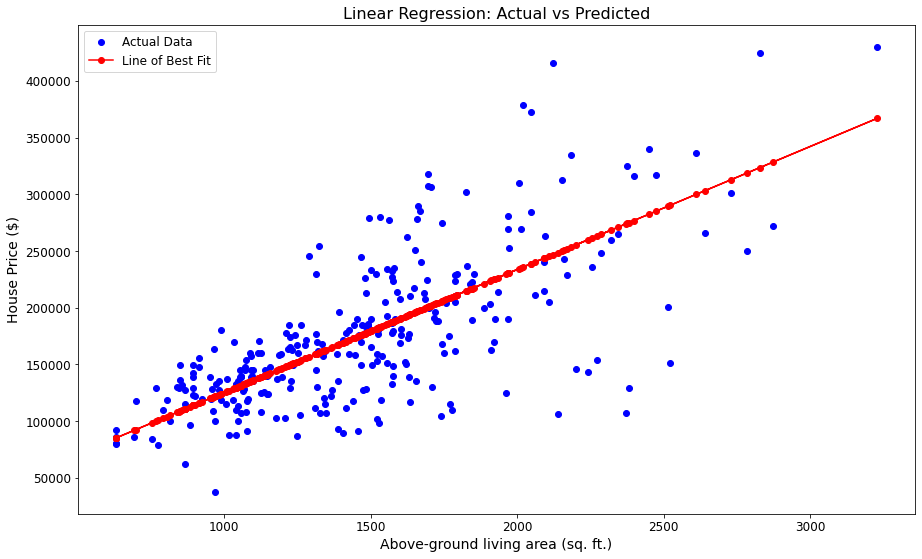

In [11]:
# Set the figure size (width, height) in inches
plt.figure(figsize=(15, 9))

# Plot the actual data points
plt.scatter(X_test['GrLivArea'], y_test, color='blue', label='Actual Data')

# Plot the line of best fit
plt.plot(X_test['GrLivArea'], y_pred, color='red', label='Line of Best Fit', linestyle='-', marker='o')

# Setting labels, title, and their font sizes
plt.xlabel('Above-ground living area (sq. ft.)', fontsize=14)
plt.ylabel('House Price ($)', fontsize=14)
plt.title('Linear Regression: Actual vs Predicted', fontsize=16)

# Set the legend with increased font size
plt.legend(fontsize=12)

# Increase the font size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

## 8. Evaluating the Model: <a id='ch8'></a>

After making predictions with our trained model, it's crucial to evaluate its performance. Two common metrics used for regression tasks are:

1. <span style="color:red">**Mean Squared Error (MSE)**</span>: Measures the average squared difference between the actual values (`y_test`) and the predicted values (`y_pred`). A lower MSE indicates a better fit of the model to the data, while a higher MSE suggests potential underfitting or overfitting. The formula for MSE is given by:

$$\Large \displaystyle \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

 - $n$ is the total number of observations
 - $y_i$ is the actual value of the observation
 - $\hat{y}_i$ is the predicted value of the observation

2. <span style="color:red">**Coefficient of Determination ($R^2$ value)**</span>: Represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An $R^2$ value closer to 1 indicates a better fit. The formula for $R^2$ is:

$$\Large \displaystyle R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$$

 - $\text{SS}_{\text{res}}$ represents the the sum of the squared residuals
 - $\text{SS}_{\text{tot}}$ represents the total sum of squares

In this section, we compute both the MSE using scikit-learn's `mean_squared_error` function and the $R^2$ value using the `score` method of our trained model. These values give us a quantitative measure of how well our linear regression model predicts house prices based on the living area.

In [12]:
# Calculate the Mean Squared Error between the actual and predicted house prices
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate the R^2 value
r2 = model.score(X_test, y_test)
print(f"R-squared Value: {r2:.2f}")

Mean Squared Error: 2211978626.12
R-squared Value: 0.49


The `model.score()` method returns the $R^2$ value when used with regression models in scikit-learn. This code will provide both the MSE and the $R^2$ value, giving a comprehensive evaluation of the model's performance.

## 9. Conclusion: <a id='ch9'></a>

In our exploration using simple linear regression, we focused on predicting house sale prices based solely on the `GrLivArea` feature, which represents the above-ground living area of the house in square feet.

The slope coefficient for GrLivArea was determined to be 108.41. This implies that for every additional square foot of living area, the house sale price is predicted to increase by approximately \$108, holding all else constant.

Our model achieved an $R^2$ value of 49.2%. This indicates that approximately 49.2% of the variability in house sale prices can be explained by the living area alone. While this is a decent starting point, there's significant room for improvement.

In the subsequent notebook, we aim to enhance the predictive power of our model by incorporating more features into our analysis. By doing so, we hope to capture more of the complexities and nuances in the data, leading to a more accurate and comprehensive model.